In [2]:
#importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
#% is the magic command this helps in ipython visualization

In [3]:
#pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [52]:
#creating datafarame
df = pd.read_csv("mcdonalds.csv")
# df.columns.value_counts()
# df.shape #1453 rows and 15 coloumns
df.info() #only age is int64 rest is all object all with 1453 entrires
# print("------------------------")
# df.memory_usage(deep=True)
# print("-----------------------")
# df.describe()
# print("--------------------")
# df.isnull().sum()
# print("----------")
#df.isin(['?']).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [31]:
size = df['Gender'].value_counts()

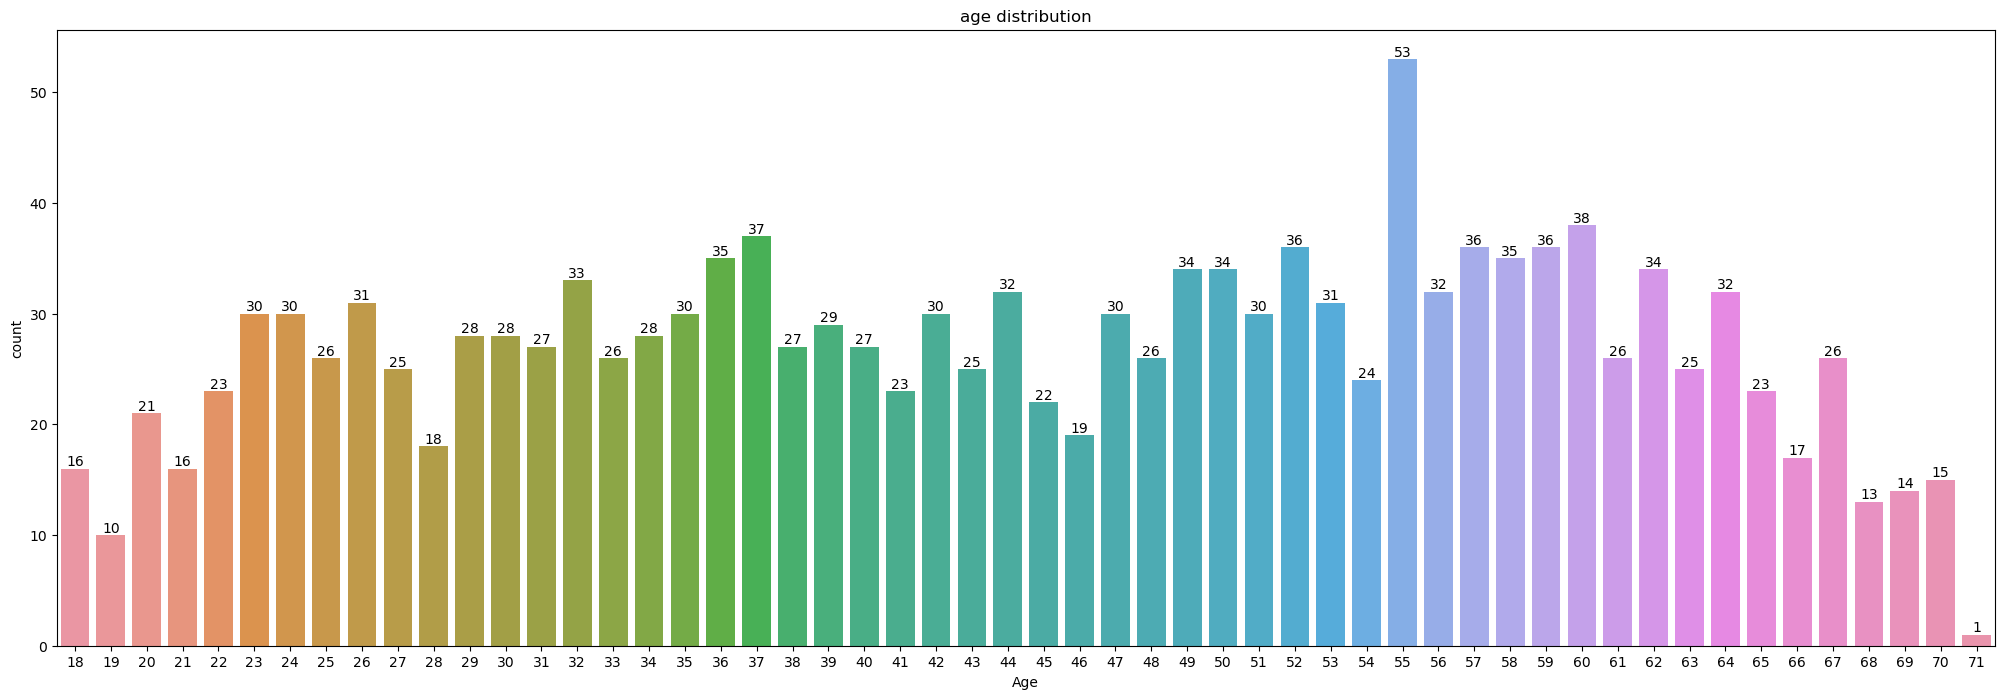

In [51]:
#age distibution  using count plot
plt.rcParams['figure.figsize'] = (25, 8) #the figure ovelaps if dont define this 
c = sns.countplot(x=df['Age'])
c.bar_label(c.containers[0])
plt.title("age distribution")
plt.show()

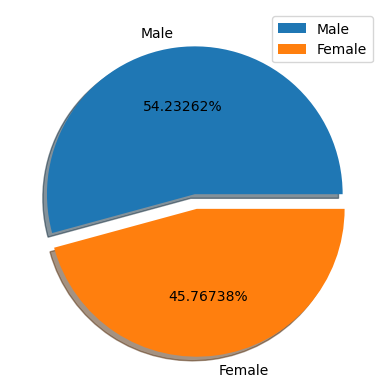

In [43]:
#plotting a pie chart for better understanding of gender distribution
plt.pie(size , labels = ['Male' , 'Female'] , explode = (0,0.1),shadow = True , autopct =  '%.5f%%')
#autopct is used to give numeric value to the distributions
plt.axis("off")
plt.legend()
plt.show()

In [54]:
#the first coloumns have categorical values henc applying lable encoder to them
#One-Hot Encoding generates several binary columns, according to the number of distinct categories, whereas Label Encoding only generates a single column for the categorical variable
from sklearn.preprocessing import LabelEncoder
#appying encoder to first 11 colomns
def encoding(x):
    df[x] = LabelEncoder().fit_transform(df[x]) #we apply fit_transform because it calcs the means and sd 
    return df
cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for i in cols:
    encoding(i)
    
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male
